In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_excel("data/Telco_customer_churn.xlsx")

In [3]:
raw_data.shape


(7043, 33)

In [4]:
raw_data.head().T

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
profile = ProfileReport(raw_data, title="Pandas Profiling Report", explorative=True)

In [7]:
#profile.to_file("profiling_report.html")

In [8]:
raw_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## Check for missing values

In [9]:
raw_data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
raw_data[raw_data['Churn Reason'].isnull()].head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN


In [11]:
raw_data.loc[raw_data['Churn Reason'].isnull(), 'Churn Label'].unique()

array(['No'], dtype=object)

From above analysis, we see that only the column `Churn Reason` has missing values. Further examination of that column reveals that the values are missing only for those observations with `Churn Label` = No. Thus it represents the customers that are still with the company and it definitely makes sense for those customers to have null value for `Churn Reason` column.

Hence it is concluded that no other treatement of null values are needed for this dataset.

## Check for duplicate values and outliers

In [12]:
len(raw_data['CustomerID'].unique())

7043

In [13]:
raw_data.shape[0]

7043

In [14]:
raw_data['Country'].unique()

array(['United States'], dtype=object)

In [15]:
raw_data['State'].unique()

array(['California'], dtype=object)

In [16]:
len(raw_data['Zip Code'].unique())

1652

In [17]:
raw_data['Zip Code'].min()

90001

In [18]:
raw_data['Zip Code'].max()

96161

The above analysis shows that our data set include 7043 observations about unique customers from the California state of United States. This includes customers from various postal codes ranging between 90001 and 96161. Also, all the observations have valid data for columns `Country`, `State` and `Zip Code`.

In [19]:
raw_data[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,7043.000000,7043.000000
mean,36.282441,-119.798880
std,2.455723,2.157889
min,32.555828,-124.301372
25%,34.030915,-121.815412
50%,36.391777,-119.730885
75%,38.224869,-118.043237
max,41.962127,-114.192901


The above statistics verifies that there are no outliers or typos in the `Latitude` and `Longitude` columns. The column `Lat Long` contains the same data in a combined form as a categorical variable.

### Analysis of binary variables

Text(0.5, 0.98, 'Check for outliers in binary variables')

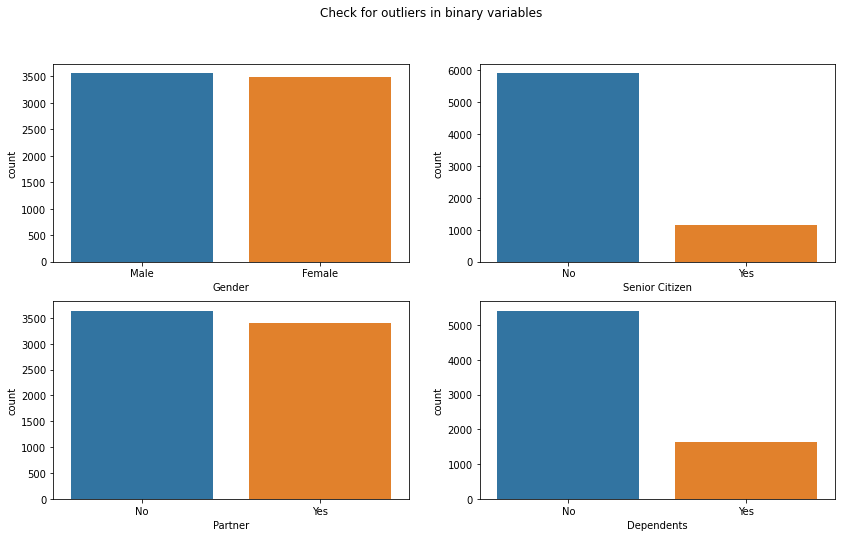

In [20]:
fig, axes = plt.subplots(2,2, figsize=(14,8))
sns.countplot(ax=axes[0,0], x='Gender', data=raw_data)
sns.countplot(ax=axes[0,1], x='Senior Citizen', data=raw_data)
sns.countplot(ax=axes[1,0], x='Partner', data=raw_data)
sns.countplot(ax=axes[1,1], x='Dependents', data=raw_data)
fig.suptitle('Check for outliers in binary variables')

### Analysis of categorical variables

<AxesSubplot:xlabel='Online Backup', ylabel='count'>

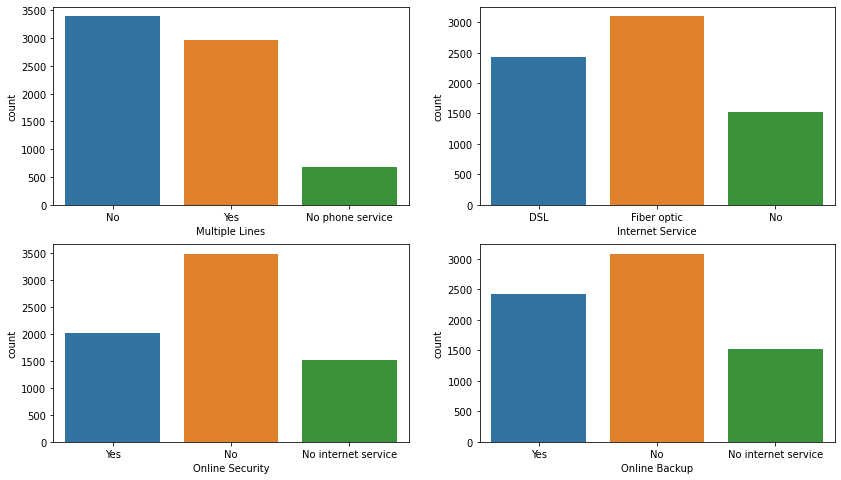

In [21]:
fig, axes = plt.subplots(2,2, figsize=(14,8))
sns.countplot(ax=axes[0,0], x='Multiple Lines', data=raw_data)
sns.countplot(ax=axes[0,1], x='Internet Service', data=raw_data)
sns.countplot(ax=axes[1,0], x='Online Security', data=raw_data)
sns.countplot(ax=axes[1,1], x='Online Backup', data=raw_data)

<AxesSubplot:xlabel='Streaming Movies', ylabel='count'>

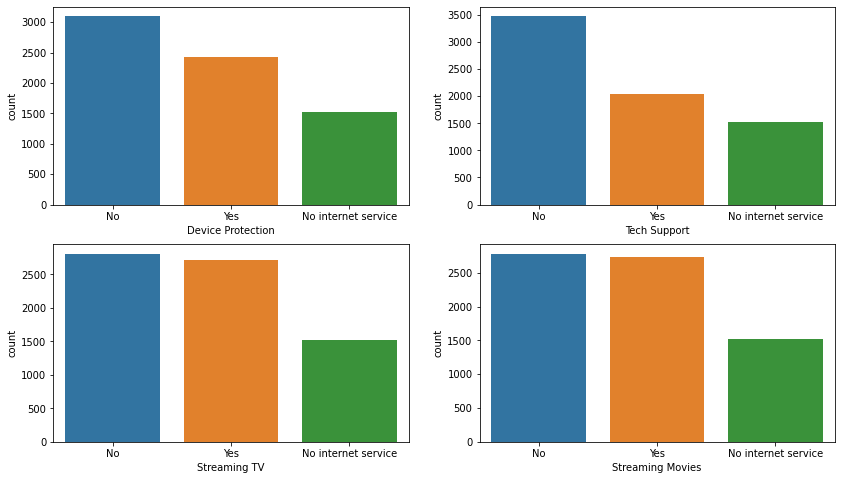

In [22]:
fig, axes = plt.subplots(2,2, figsize=(14,8))
sns.countplot(ax=axes[0,0], x='Device Protection', data=raw_data)
sns.countplot(ax=axes[0,1], x='Tech Support', data=raw_data)
sns.countplot(ax=axes[1,0], x='Streaming TV', data=raw_data)
sns.countplot(ax=axes[1,1], x='Streaming Movies', data=raw_data)

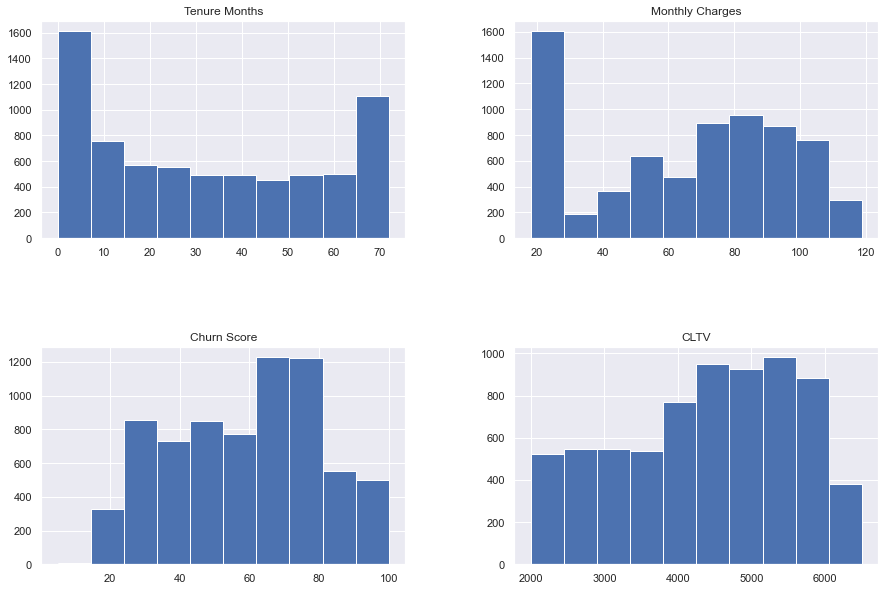

In [23]:
sns.set()
raw_data[['Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV']].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## Analysis of target variable

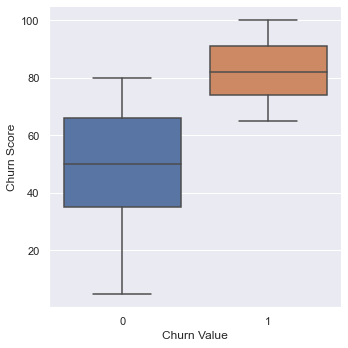

In [24]:
p = sns.catplot(x='Churn Value', y='Churn Score', data=raw_data, kind='box')
plt.show()

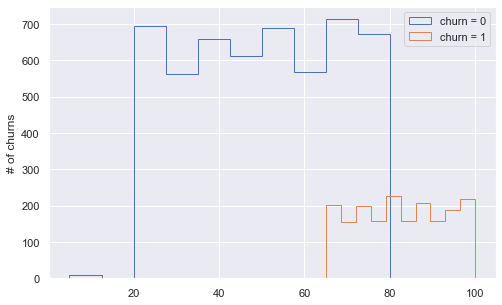

In [25]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(raw_data.loc[raw_data['Churn Value']==0, 'Churn Score'], histtype='step', label='churn = 0')
ax.hist(raw_data.loc[raw_data['Churn Value']==1, 'Churn Score'], histtype='step', label='churn = 1')
ax.set_ylabel("# of churns")
ax.legend()

In [26]:
target_counts = raw_data['Churn Label'].value_counts(normalize=True)
target_counts = target_counts.rename('percent').reset_index()
target_counts['percent'] = target_counts['percent'] * 100

Text(0.5, 1.0, 'Distribution of target variable')

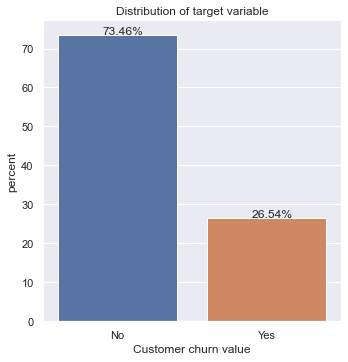

In [27]:
g = sns.catplot(x='index', y='percent', data=target_counts, kind='bar')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height() + 0.2
    g.ax.text(txt_x,txt_y,txt)

plt.xlabel('Customer churn value')
plt.title('Distribution of target variable')

In [28]:
target_counts

,index,percent
0,No,73.463013
1,Yes,26.536987


### Summary

* The dataset includes 7043 observations about telecommunication customers from California. Out of the 7043 rows, 27% of the customers left the company in the end of Q3
* No missing values in any columns except `Churn Reason`. This column has a value only for those customers who left the company.


**Numerical columns**
* Tenure Months, Monthly Charges, Churn Score, CLTV
* No missing values or outliers in any of these columns

**categorical columns**
* Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Payment Method, 

**boolean columns**
* Gender, Senior Citizen, Partner, Dependents, Phone Service, Paperless Billing, Churn Label, Churn Value

**others**
* City, Churn Reason

Careful analysis of dataset verifies that dataset is clean and there are no outliers. Also, all the columns have the correct data type. 